In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# READ DATA FROM CSV
df = pd.read_csv("datasets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

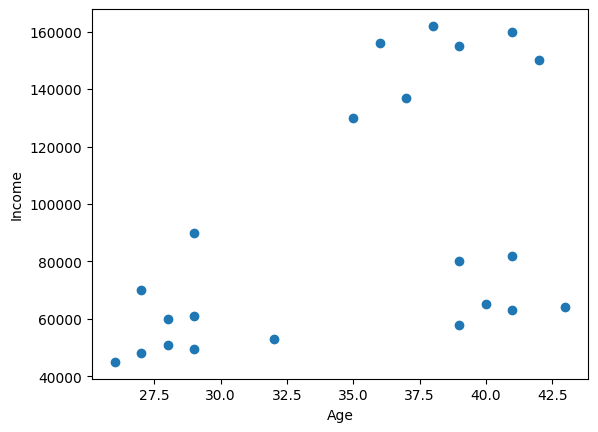

In [68]:
# SCATTER PLOT OF AGE VS INCOME
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")

In [69]:
# IMPORT KMEANS MODEL
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [70]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [71]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [72]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

Text(0, 0.5, 'Income($)')

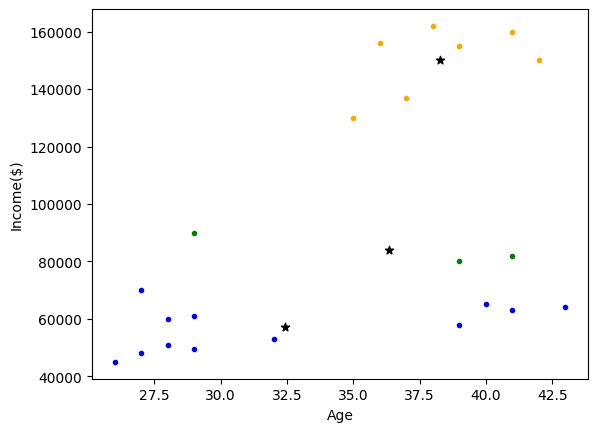

In [73]:
# SEPARATING DATAFRAME BASED ON CLUSTER
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

# PLOT THE GRAPH
plt.scatter(df1['Age'], df1['Income($)'], marker=".", color="blue")
plt.scatter(df2['Age'], df2['Income($)'], marker=".", color="orange")
plt.scatter(df3['Age'], df3['Income($)'], marker=".", color="green")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*", color="black",label="centroid")
plt.xlabel('Age')
plt.ylabel('Income($)')

In [74]:
# PREPROCESSING USING MIN MAX SCALER
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


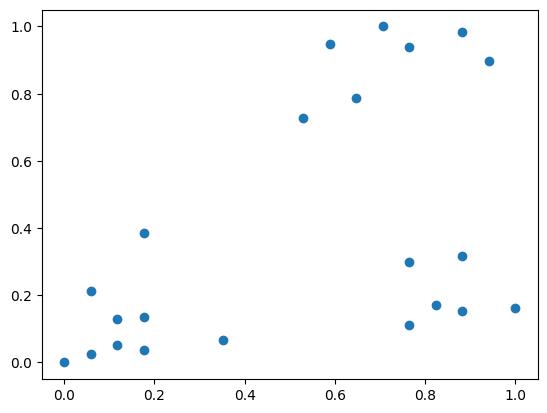

In [75]:
# PLOT AFTER MIN MAX SCALER
plt.scatter(df.Age, df['Income($)'])

In [76]:
# K MEANS CLUSTERING AFTER MIN MAX SCALER
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [77]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [78]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income($)')

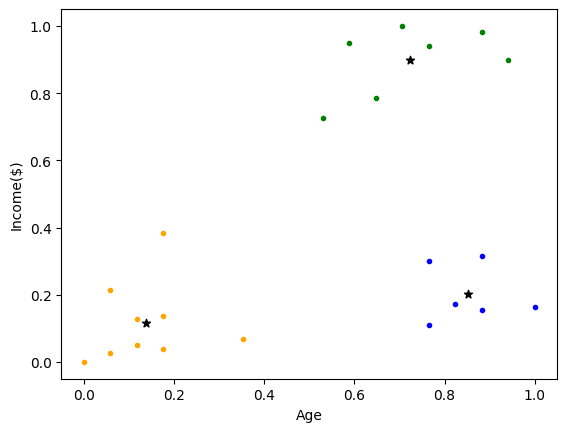

In [79]:
# SEPARATING DATAFRAME BASED ON CLUSTER
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

# PLOT THE GRAPH
plt.scatter(df1['Age'], df1['Income($)'], marker=".", color="blue")
plt.scatter(df2['Age'], df2['Income($)'], marker=".", color="orange")
plt.scatter(df3['Age'], df3['Income($)'], marker=".", color="green")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*", color="black",label="centroid")
plt.xlabel('Age')
plt.ylabel('Income($)')

In [80]:
# LET'S FIND THE RIGHT NUMBER OF CLUSTERS USING ELBOW PLOT
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [81]:
sse

[5.43401151198818,
 2.4571335359046356,
 0.4750783498553096,
 0.39237665288019463,
 0.26640301246684156,
 0.23472396003560053,
 0.19429256406898143,
 0.1580808574864116,
 0.12318585975167762]

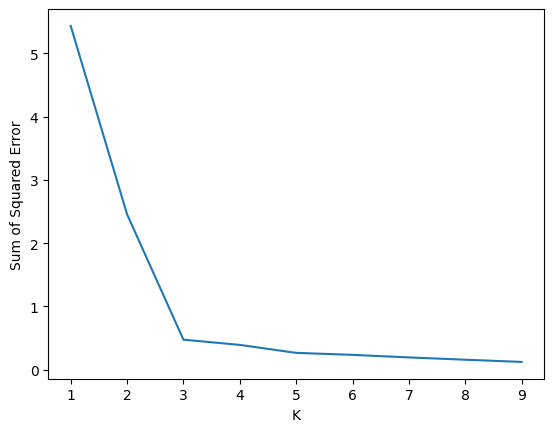

In [82]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range, sse)